# RIO- 125 Classification Model - Build a Model that Classifies the Side Effects of a Drug

In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required libraries

import pandas as pd
import numpy as np
from faker import Faker

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Remove warnings:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
#Read the dataset and display

data = pd.read_csv(r'C:\Users\HP\Desktop\Intership\webmd.csv')
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Data Understanding

In [4]:
#Check number of rows and columns of the dataset

data.shape

(362806, 12)

In [5]:
#display the columns of the data

data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
#type of each columns in the data

data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [8]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

In [9]:
# some basic statistical analysis about the data

data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [10]:
#dimensions of the data

data.ndim

2

Add fake names and races columns

In [11]:
fake = Faker()

In [12]:
race = ['Black','White','Asian','Hispanic'] 

In [13]:
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(race) for _ in range(len(data))]

In [14]:
# Rename the column sides
data = data.rename(columns={'Sides':'SideEffects'})

In [15]:
# Set the columns 'Name' and 'Race' as the first and second level
data = data.set_index(['Name', 'Race'])

# Reset the index to move 'Name' and 'Race' back to columns
data = data.reset_index()

In [16]:
data.head(2)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
0,April Cole,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Edward Bell,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [17]:
#check unique values

data.nunique()

Name             180873
Race                  4
Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
SideEffects        1651
UsefulCount         148
dtype: int64

In [18]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           362806 non-null  object        
 1   Race           362806 non-null  object        
 2   Age            362806 non-null  object        
 3   Condition      362806 non-null  object        
 4   Date           362806 non-null  datetime64[ns]
 5   Drug           362806 non-null  object        
 6   DrugId         362806 non-null  int64         
 7   EaseofUse      362806 non-null  int64         
 8   Effectiveness  362806 non-null  int64         
 9   Reviews        362769 non-null  object        
 10  Satisfaction   362806 non-null  int64         
 11  Sex            362806 non-null  object        
 12  SideEffects    362806 non-null  object        
 13  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usa

In [20]:
data.Drug.value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

# Exploratory data analysis

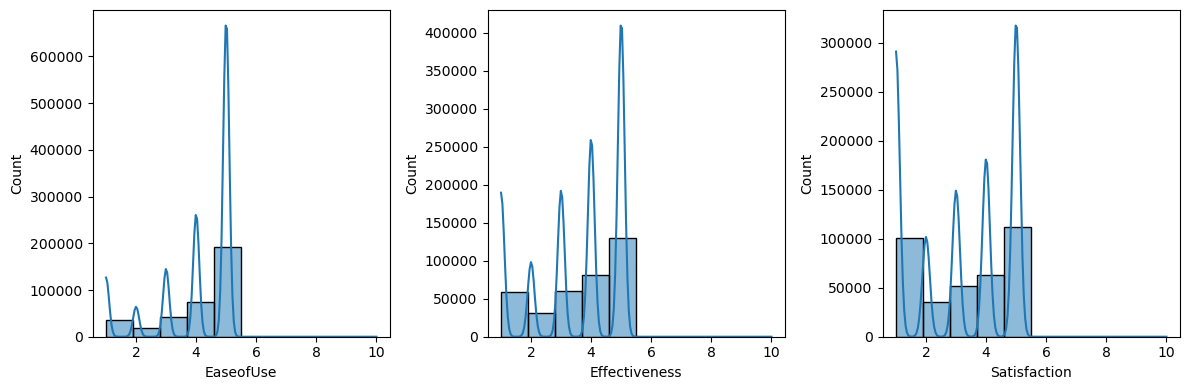

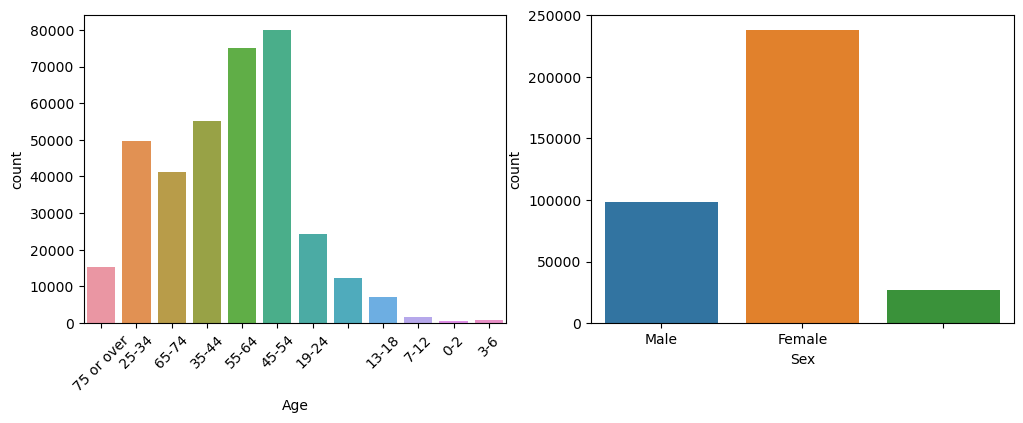

In [21]:
# Histograms of some numerical columns

plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(data=data, x='EaseofUse', bins=10, kde=True)
plt.subplot(132)
sns.histplot(data=data, x='Effectiveness', bins=10, kde=True)
plt.subplot(133)
sns.histplot(data=data, x='Satisfaction', bins=10, kde=True)
plt.tight_layout()


# Bar Charts of some categorical columns

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(data=data, x='Age')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(data=data, x='Sex')
plt.show()


The "Effectiveness" and "EaseofUse" columns show that some individuals rated the drugs very highly in terms of effectiveness and ease of use, with ratings of 5. This suggests that some drugs have received positive reviews from users.

The "Satisfaction" column indicates that individuals in the dataset generally expressed satisfaction with the medications they reviewed. Ratings of 5 suggest high levels of satisfaction.

Most of the patients are Female and around the age 45-54 have diseases.

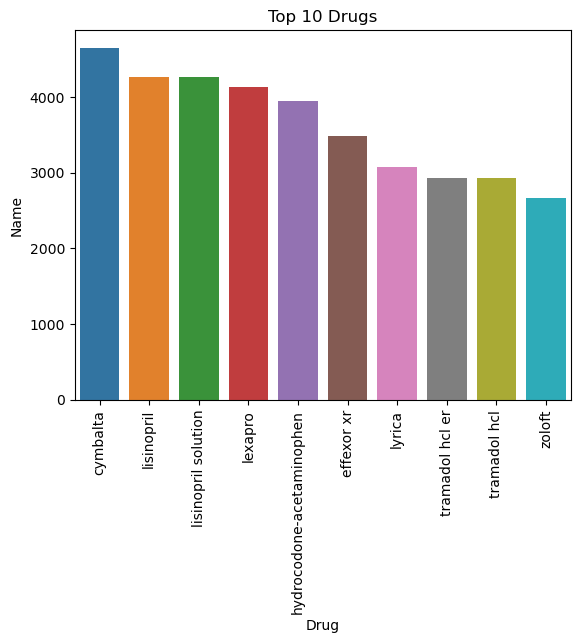

In [22]:
# Top 10 Drugs based on No. of Users

data_= data['Drug'].value_counts().head(10).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.title("Top 10 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta tops the list followed by Lisinopril and all the 10 drugs has been used more than 2500 people.

Text(0, 0.5, 'Users')

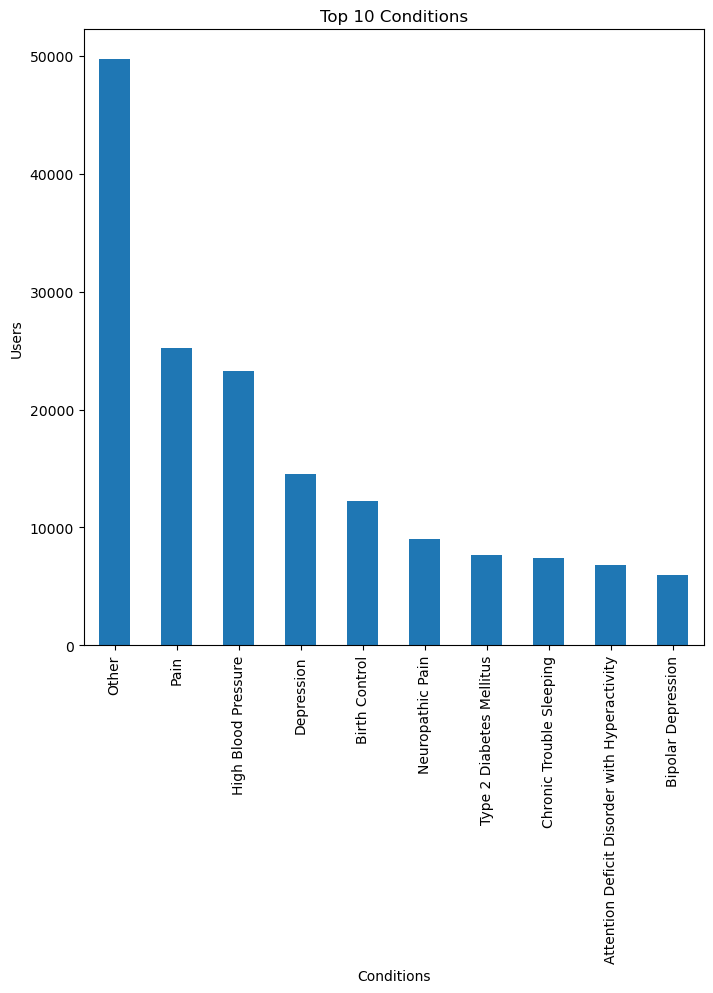

In [23]:
# Top 10 Conditions

data['Condition'].value_counts().nlargest(10).plot(kind='bar',figsize=(8,8))
plt.title("Top 10 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Around 50,000 users have reported other conditions and around more than 2500 people reporting pain

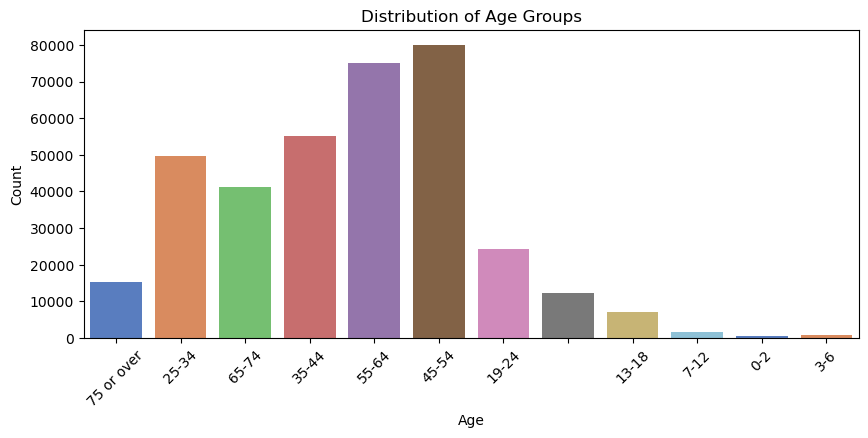

            Counts  Percentages (%)
45-54        80043        22.062204
55-64        75136        20.709691
35-44        55011        15.162649
25-34        49718        13.703742
65-74        41216        11.360341
19-24        24230         6.678500
75 or over   15226         4.196733
             12202         3.363230
13-18         7045         1.941809
7-12          1644         0.453135
3-6            838         0.230977
0-2            497         0.136988


In [24]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Age', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Summary statistics
age_counts = data['Age'].value_counts()
age_percentages = (age_counts / age_counts.sum()) * 100
age_summary = pd.DataFrame({'Counts': age_counts, 'Percentages (%)': age_percentages})
print(age_summary)


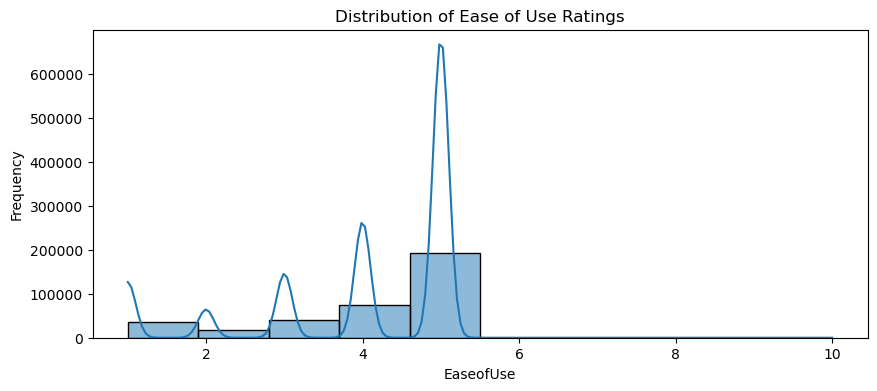

Mean EaseofUse: 4.02
Median EaseofUse: 5.00
Standard Deviation EaseofUse: 1.32


In [25]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='EaseofUse', bins=10, kde=True)
plt.title('Distribution of Ease of Use Ratings')
plt.xlabel('EaseofUse')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
easeofuse_mean = data['EaseofUse'].mean()
easeofuse_median = data['EaseofUse'].median()
easeofuse_std = data['EaseofUse'].std()
print(f"Mean EaseofUse: {easeofuse_mean:.2f}")
print(f"Median EaseofUse: {easeofuse_median:.2f}")
print(f"Standard Deviation EaseofUse: {easeofuse_std:.2f}")


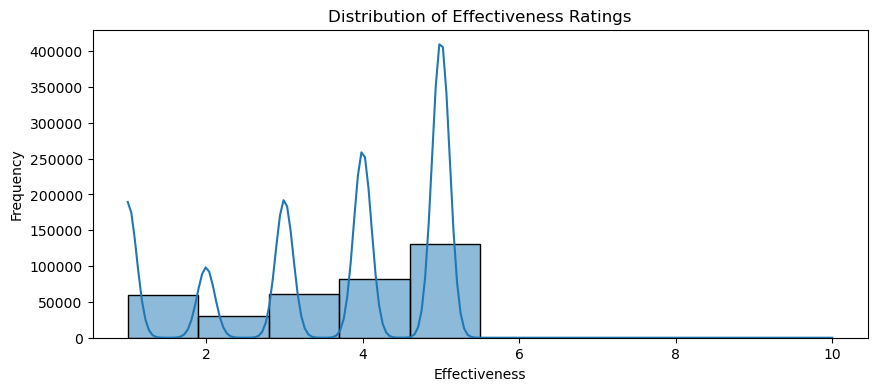

Mean Effectiveness: 3.53
Median Effectiveness: 4.00
Standard Deviation Effectiveness: 1.46


In [26]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Effectiveness', bins=10, kde=True)
plt.title('Distribution of Effectiveness Ratings')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
effectiveness_mean = data['Effectiveness'].mean()
effectiveness_median = data['Effectiveness'].median()
effectiveness_std = data['Effectiveness'].std()
print(f"Mean Effectiveness: {effectiveness_mean:.2f}")
print(f"Median Effectiveness: {effectiveness_median:.2f}")
print(f"Standard Deviation Effectiveness: {effectiveness_std:.2f}")


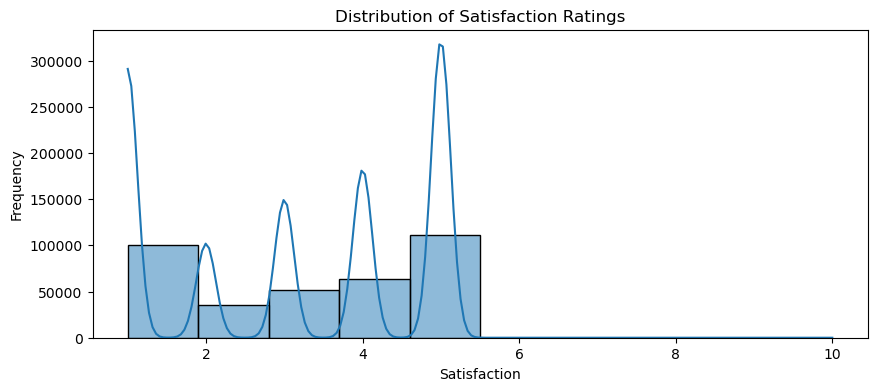

Mean Satisfaction: 3.14
Median Satisfaction: 3.00
Standard Deviation Satisfaction: 1.61


In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Satisfaction', bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
satisfaction_mean = data['Satisfaction'].mean()
satisfaction_median = data['Satisfaction'].median()
satisfaction_std = data['Satisfaction'].std()
print(f"Mean Satisfaction: {satisfaction_mean:.2f}")
print(f"Median Satisfaction: {satisfaction_median:.2f}")
print(f"Standard Deviation Satisfaction: {satisfaction_std:.2f}")


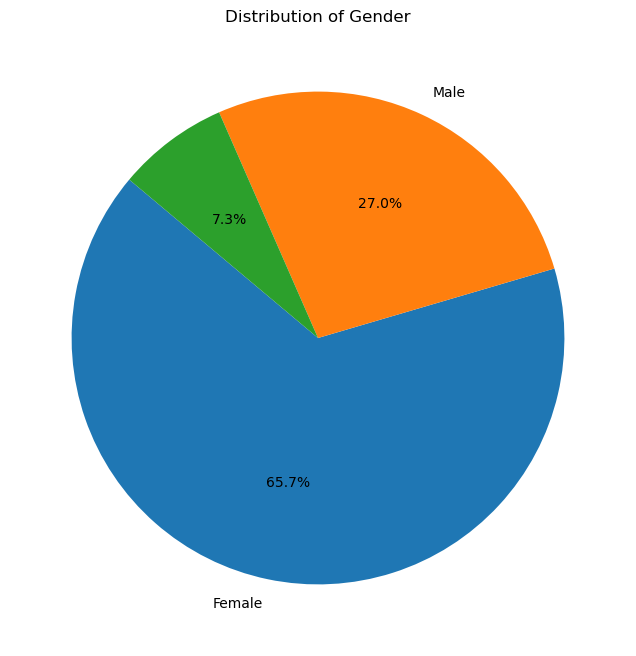

        Counts  Percentages (%)
Female  238226        65.662089
Male     98043        27.023533
         26537         7.314377


In [28]:
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

# Summary statistics
sex_summary = pd.DataFrame({'Counts': sex_counts, 'Percentages (%)': (sex_counts / sex_counts.sum()) * 100})
print(sex_summary)


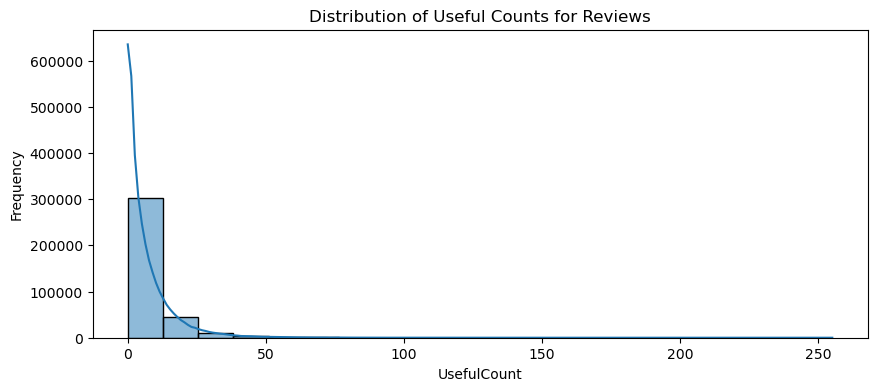

Mean UsefulCount: 6.74
Median UsefulCount: 4.00
Standard Deviation UsefulCount: 9.32


In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='UsefulCount', bins=20, kde=True)
plt.title('Distribution of Useful Counts for Reviews')
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
usefulcount_mean = data['UsefulCount'].mean()
usefulcount_median = data['UsefulCount'].median()
usefulcount_std = data['UsefulCount'].std()
print(f"Mean UsefulCount: {usefulcount_mean:.2f}")
print(f"Median UsefulCount: {usefulcount_median:.2f}")
print(f"Standard Deviation UsefulCount: {usefulcount_std:.2f}")


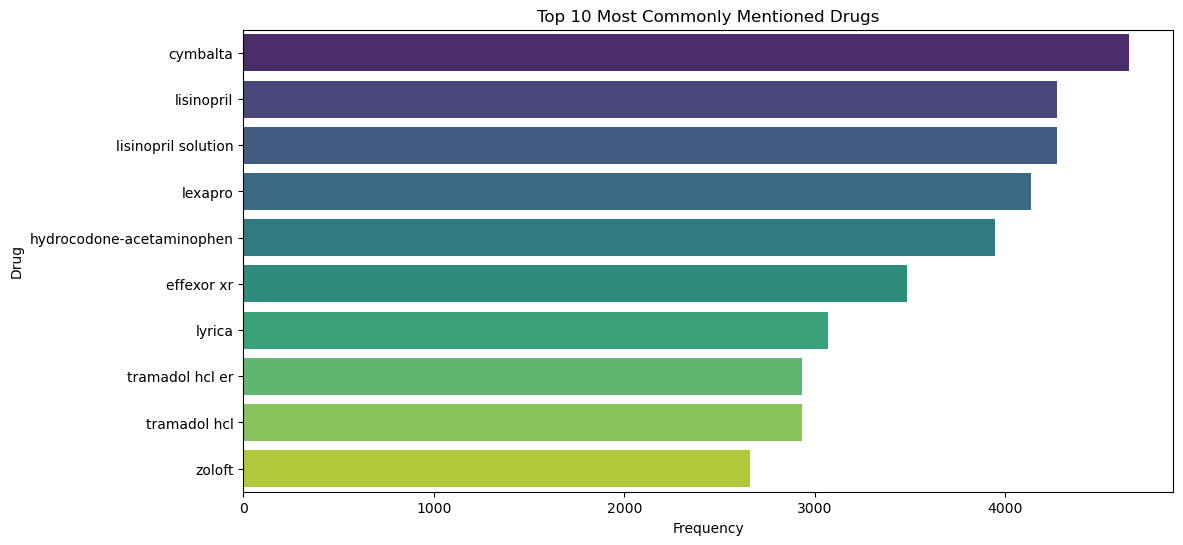

In [30]:
# Assuming you want to visualize the distribution of the top N drugs (change N as needed)
top_n_drugs = 10

# Get the top 10 most frequently mentioned drugs in the dataset
top_drugs = data['Drug'].value_counts().head(top_n_drugs)

# Create a bar chart to visualize the drug distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')
plt.title(f'Top {top_n_drugs} Most Commonly Mentioned Drugs')
plt.xlabel('Frequency')
plt.ylabel('Drug')
plt.show()


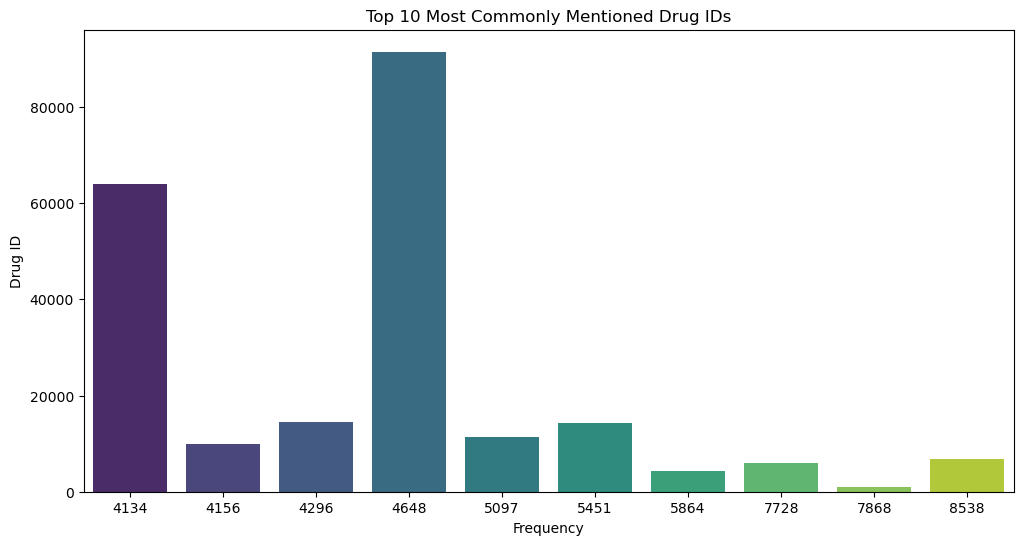

In [31]:
# Assuming you want to visualize the distribution of the top N Drug IDs (change N as needed)
top_n_drug_ids = 10

# Get the top 10 most frequently mentioned Drug IDs in the dataset
top_drug_ids = data['DrugId'].value_counts().head(top_n_drug_ids)

# Create a bar chart to visualize the Drug ID distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drug_ids.values, y=top_drug_ids.index, palette='viridis')
plt.title(f'Top {top_n_drug_ids} Most Commonly Mentioned Drug IDs')
plt.xlabel('Frequency')
plt.ylabel('Drug ID')
plt.show()


Text(0.5, 1.0, 'Users by Race and Gender')

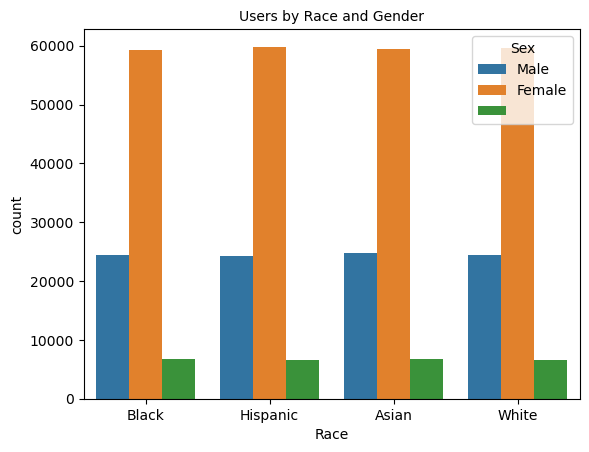

In [32]:
sns.countplot(x='Race',hue='Sex',data=data)
plt.title("Users by Race and Gender", fontsize = 10)

Text(0.5, 1.0, 'Users by Age and Gender')

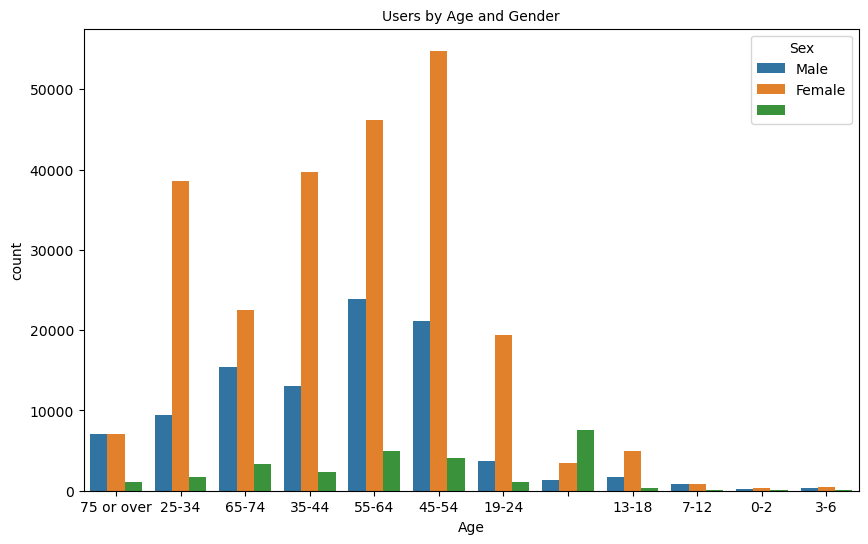

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data)
plt.title("Users by Age and Gender", fontsize = 10)

Text(0, 0.5, 'Count')

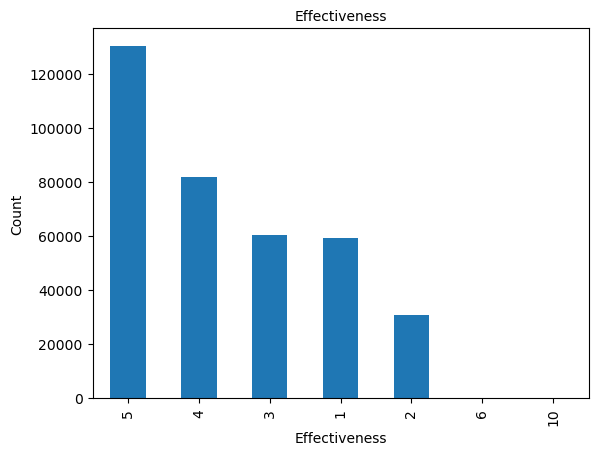

In [34]:
data['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

<Figure size 1000x800 with 0 Axes>

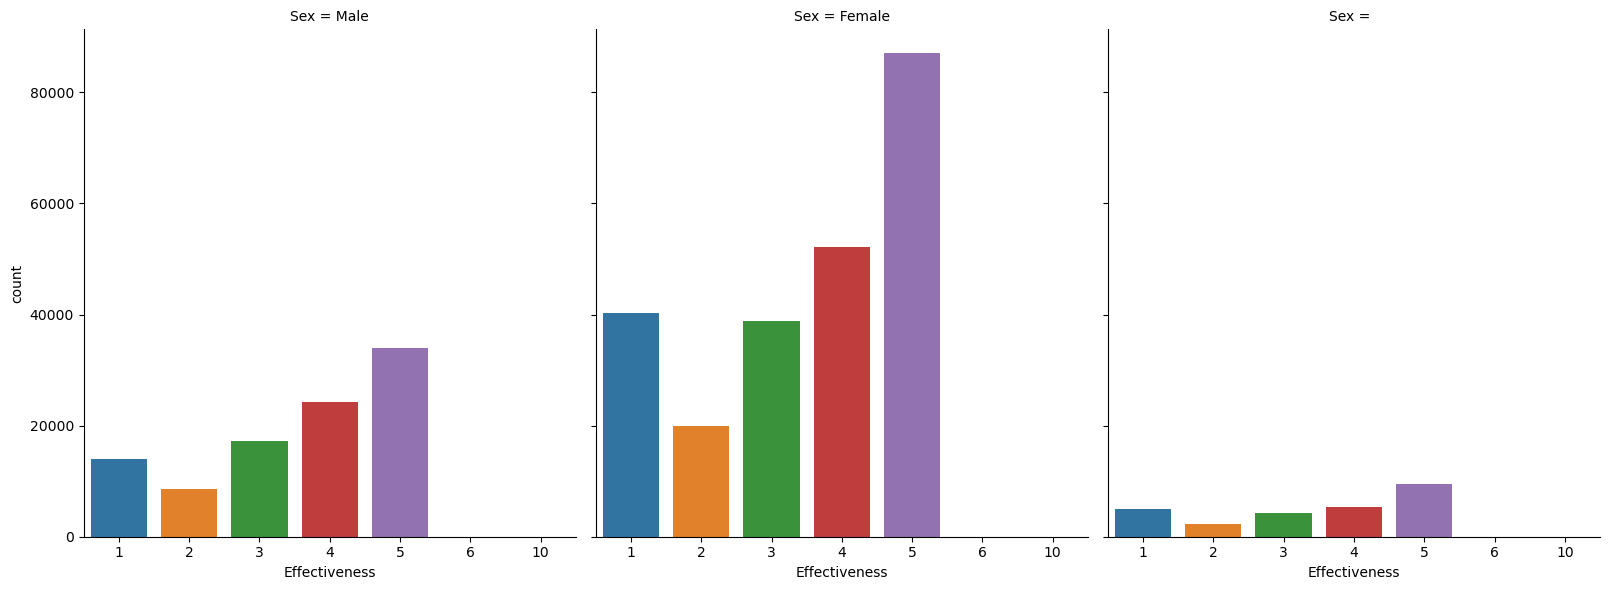

In [35]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

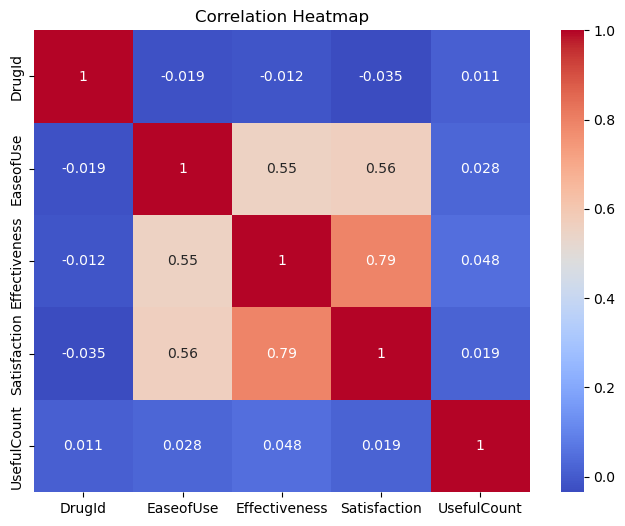

In [36]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

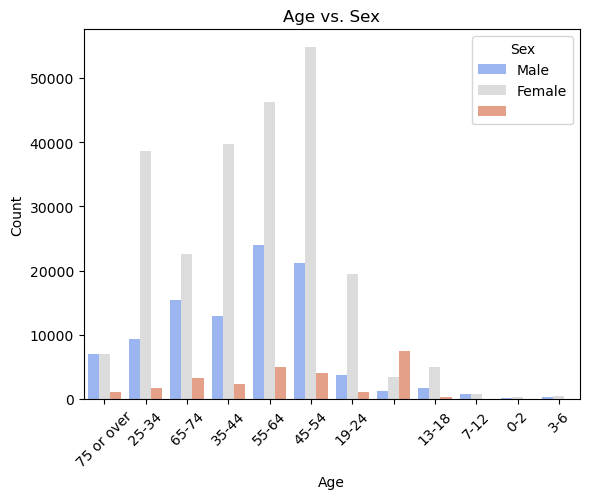

In [37]:
sns.countplot(data=data, x='Age', hue='Sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Age vs. Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


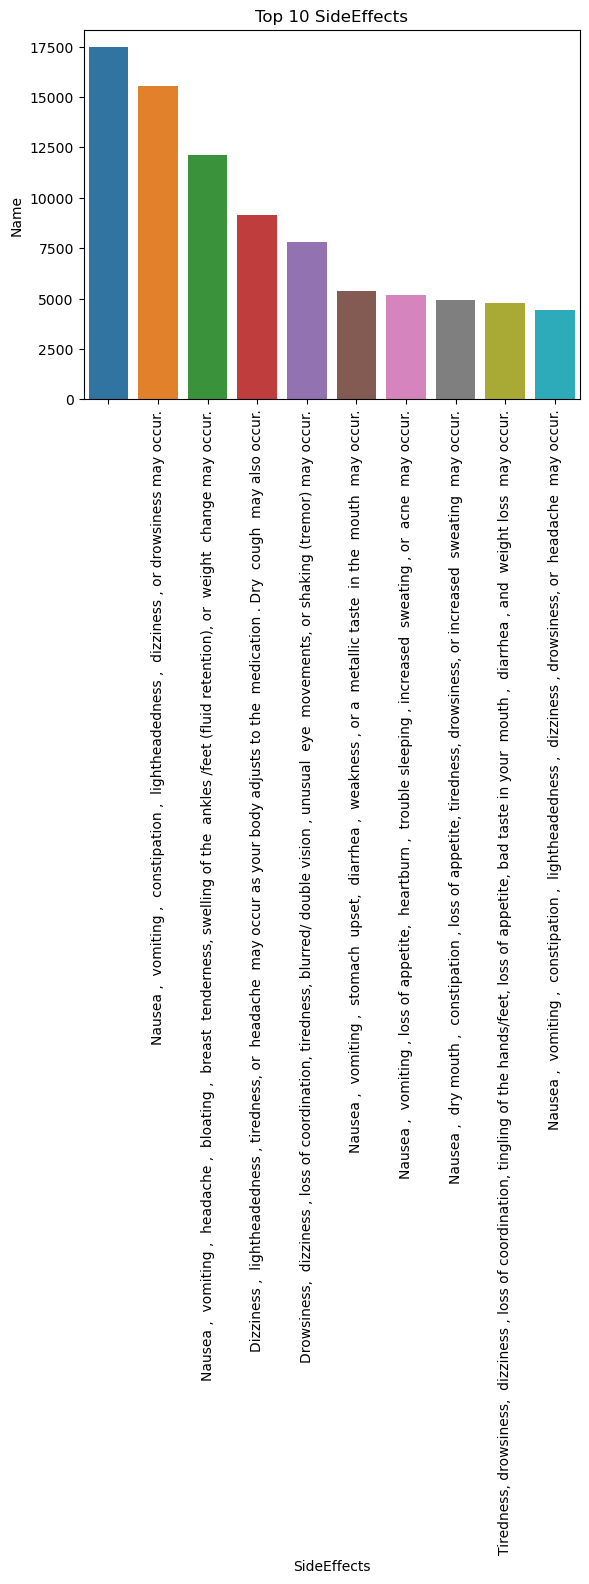

In [38]:
# Top 10 sideeffects based on No. of Users

data_= data['SideEffects'].value_counts().head(10).reset_index()
data_.columns = ['SideEffects', 'Name']
sns.barplot(data=data_, x = 'SideEffects', y = 'Name')
plt.title("Top 10 SideEffects")
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [39]:
# Check for missing values:

data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
SideEffects       0
UsefulCount       0
dtype: int64

Only in reviews column has missing values

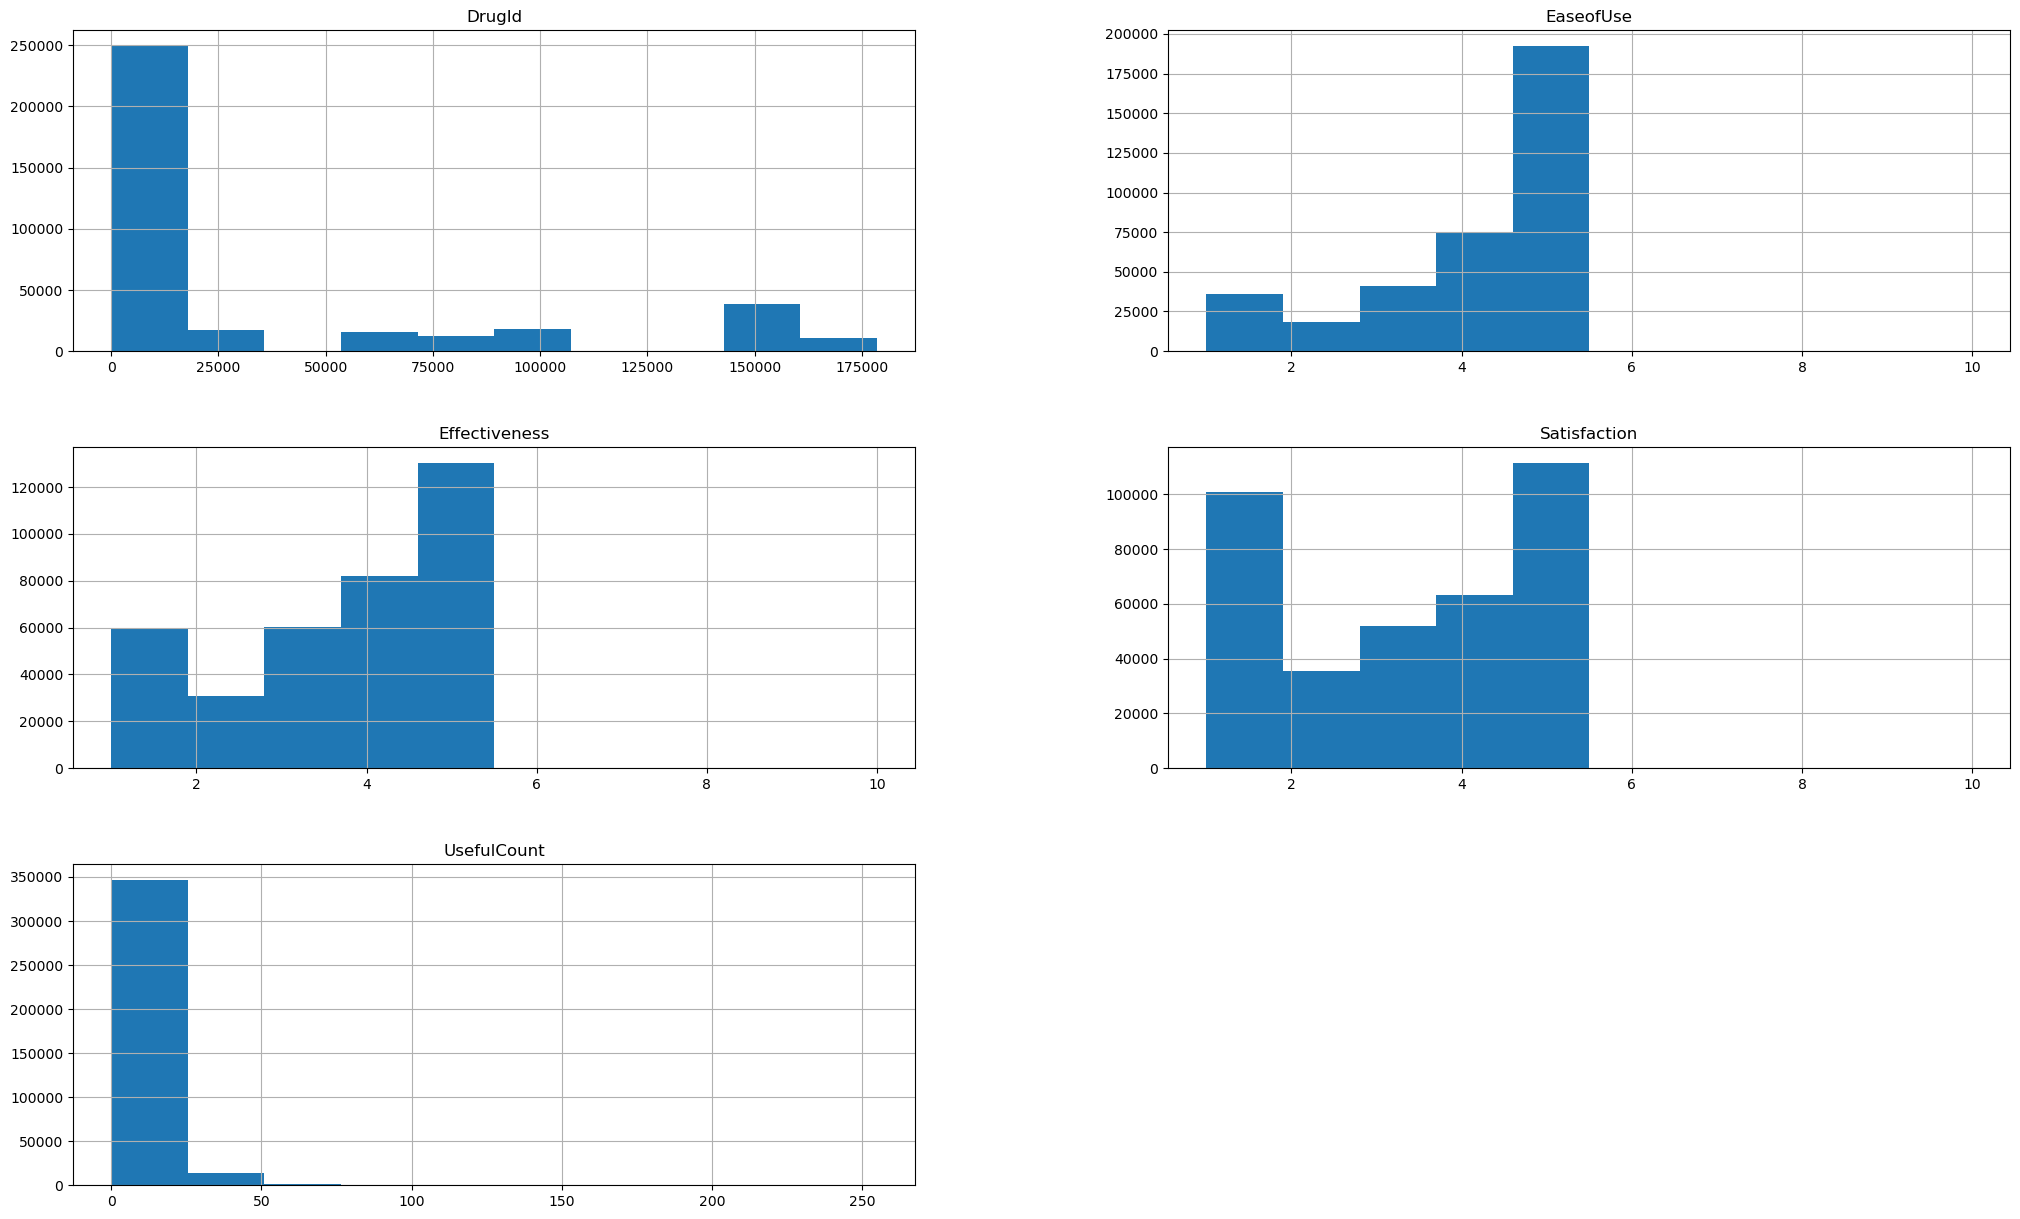

In [40]:
#plot graphs for float and int data types

freqgraph = data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(25,15))
plt.show()

In [41]:
# Filling the missing values in the review column of the dataset with unknown

data['Reviews'].fillna('Unknown', inplace=True)

In [42]:
# Again check for count of null values:

data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
SideEffects      0
UsefulCount      0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           362806 non-null  object        
 1   Race           362806 non-null  object        
 2   Age            362806 non-null  object        
 3   Condition      362806 non-null  object        
 4   Date           362806 non-null  datetime64[ns]
 5   Drug           362806 non-null  object        
 6   DrugId         362806 non-null  int64         
 7   EaseofUse      362806 non-null  int64         
 8   Effectiveness  362806 non-null  int64         
 9   Reviews        362806 non-null  object        
 10  Satisfaction   362806 non-null  int64         
 11  Sex            362806 non-null  object        
 12  SideEffects    362806 non-null  object        
 13  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usa

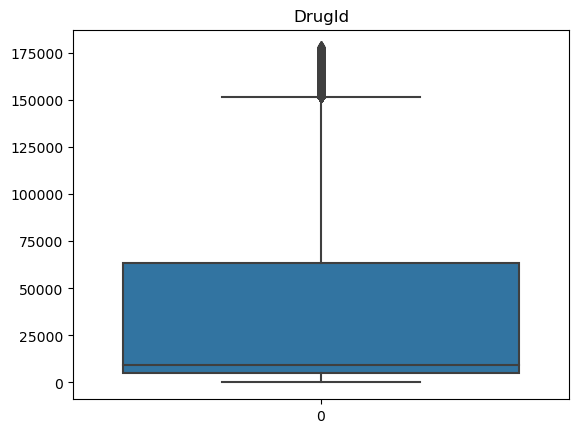

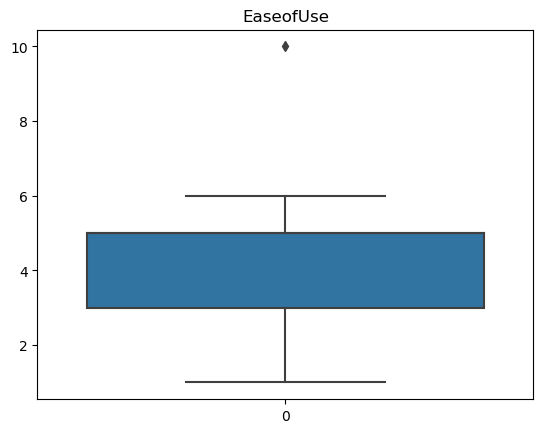

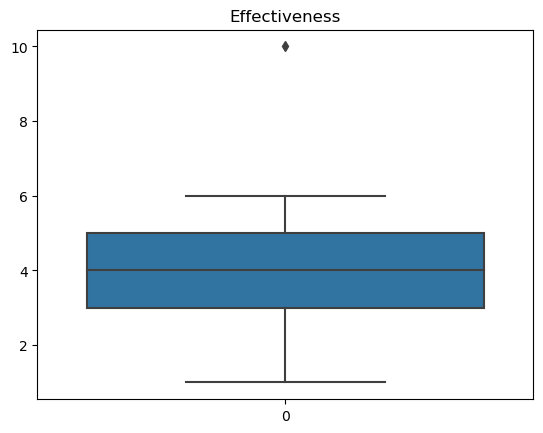

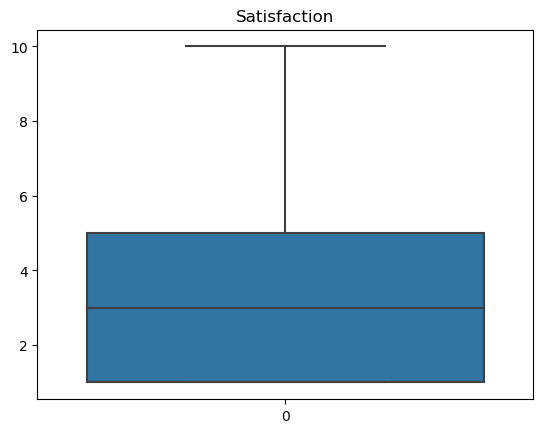

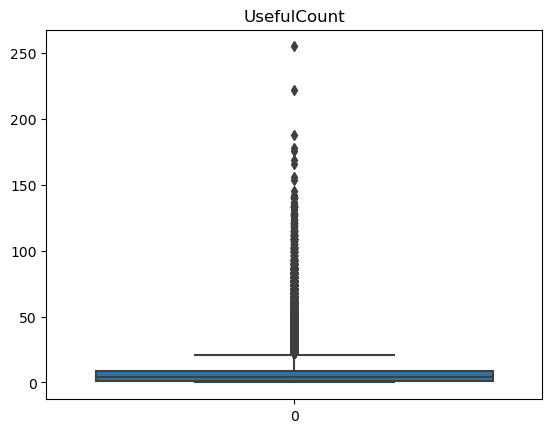

In [44]:
#create a boxplot to display outlier


num_cols = ['DrugId', 'EaseofUse',
       'Effectiveness','Satisfaction','UsefulCount']
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

There is outliers in 'DrugId', 'EaseofUse','Effectiveness' and 'UsefulCount' columns and only one outlier in easeofuse and effectiveness